In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
mall_data = pd.read_csv("mall.csv")
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


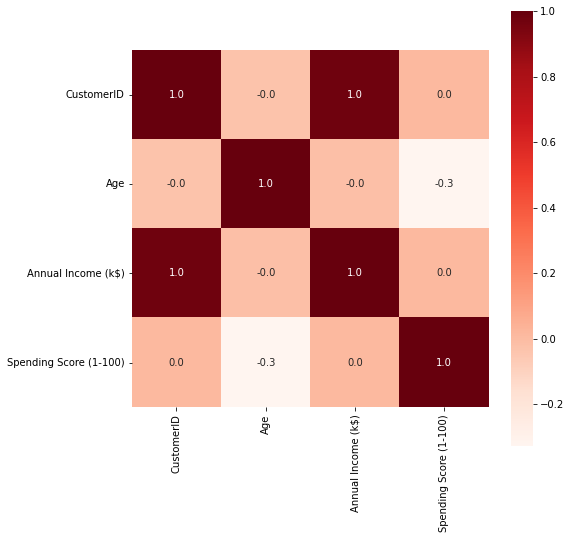

In [ ]:
# We can use a heatmap to check correlation between the variables.
corr = mall_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

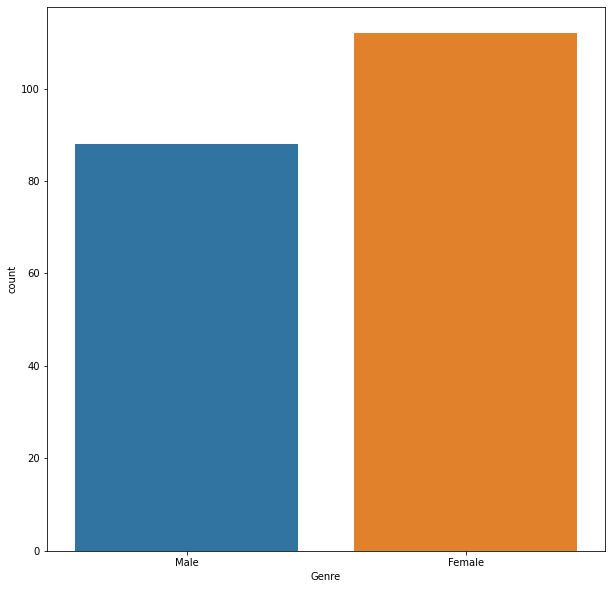

In [ ]:
# Which gender shops more?
plt.figure(figsize=(10,10))
sns.countplot(x="Genre", data=mall_data)

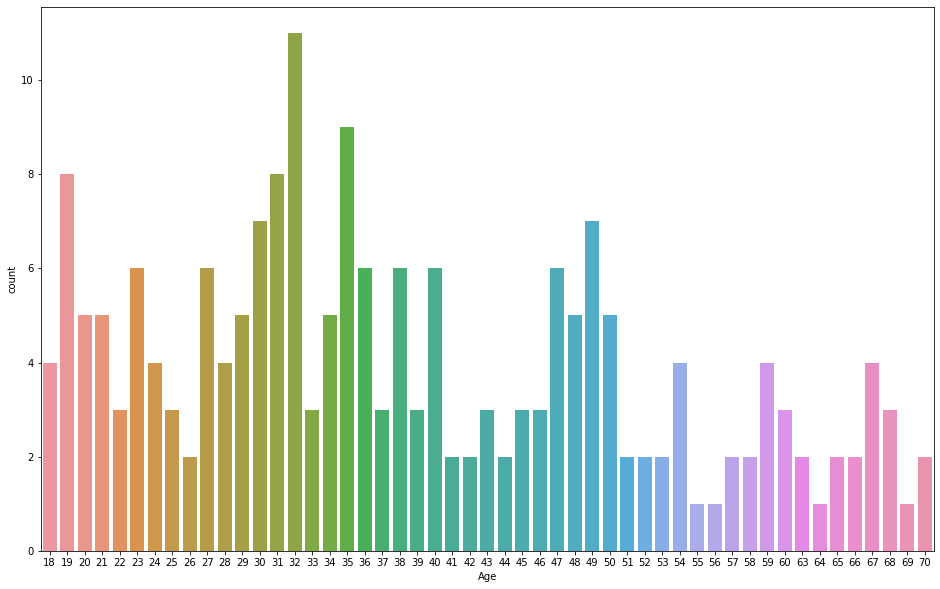

In [ ]:
# People of what ages shop more?
plt.figure(figsize=(16,10))
sns.countplot(x="Age", data=mall_data)

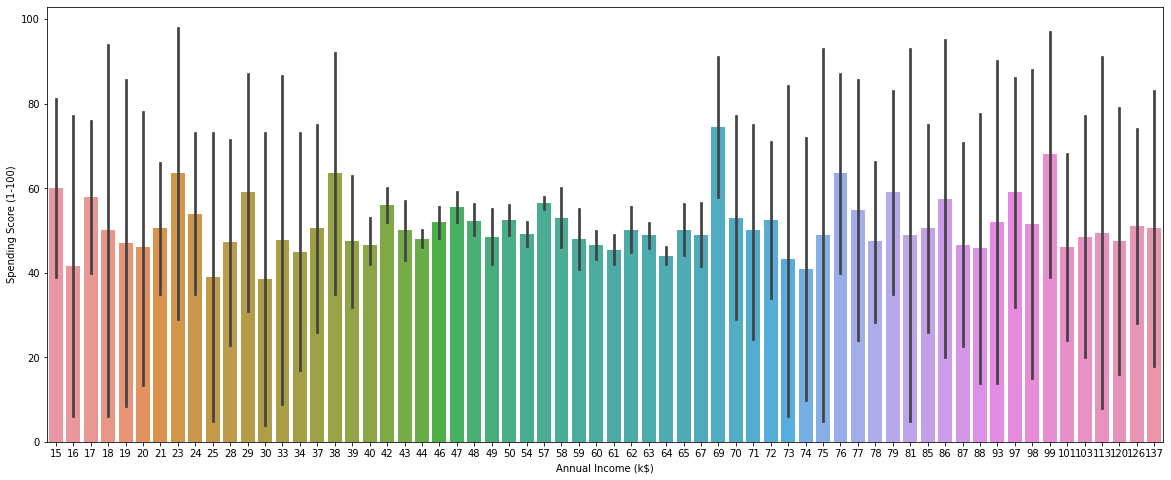

In [ ]:
# Is there really no relationship between annual income and spending score?
plt.figure(figsize=(20,8))
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_data)

In [ ]:
# For our model, we can choose whatever variables we think are relevant or necessary, we needn't choose all.
# I'm going to choose age, annual income and spending score columns for my clustering model.
X = mall_data.iloc[:,[2,3,4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [ ]:
#Now, we need to find the optimal number of clusters for this dataset. 
#To do that, we will use WCSS (within-cluster-sum-of-squares) parameter. 
#WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. 
#The idea is to minimise the sum.
wcss = []
for i in range(1,11): # It will find wcss value for different number of clusters (for 1 cluster, for 2...until 10 clusters) and put it in our list
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75350.77917248776,
 58300.44332159069,
 51118.949931647294,
 44637.39564017064,
 40936.763713763714,
 37048.59133348134]

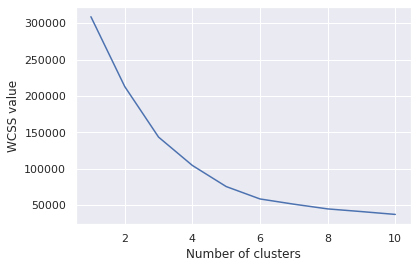

In [ ]:
# elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()

In [ ]:
#Building the model
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 0)

In [ ]:

# we need a label for each datapoint relative to their clusters 
#(will be split into 5 clusters and each will be labelled 0-4)
y = kmeans.fit_predict(X)

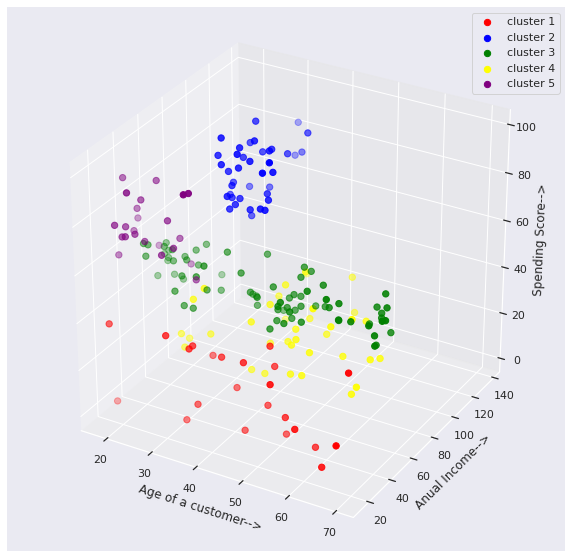

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0],X[y == 0,1],X[y == 0,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(X[y == 1,0],X[y == 1,1],X[y == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(X[y == 2,0],X[y == 2,1],X[y == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X[y == 3,0],X[y == 3,1],X[y == 3,2], s = 40 , color = 'yellow', label = "cluster 4")
ax.scatter(X[y == 4,0],X[y == 4,1],X[y == 4,2], s = 40 , color = 'purple', label = "cluster 5")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

